## Панкратьев Иван

#### Вариант 14

Цель лабораторной работы – получение навыков работы с методами регрессии
1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
3.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
4.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
5.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других;
6.	Заполните пропущенные значения в данных;
7.	Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйтеперекрёстную проверку (изучите возможные для изменения параметры метода регрессии).  Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказаннымс учётом p-value.


Использовать линейную регрессию, LASSO регуляризатор и RIDGE регуляризатор;


In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from scipy.stats import pearsonr, spearmanr
from sklearn import preprocessing

In [33]:
auto = pd.read_csv("autos.csv", encoding='iso-8859-1')
auto.head(20)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,privat,Angebot,0,test,limousine,1980,manuell,50,andere,40000,7,benzin,volkswagen,nein,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,2016-04-04 23:42:13,Ford_C___Max_Titanium_1_0_L_EcoBoost,privat,Angebot,14500,control,bus,2014,manuell,125,c_max,30000,8,benzin,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,2016-03-17 10:53:50,VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...,privat,Angebot,999,test,kleinwagen,1998,manuell,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


- dateCrawled : время сканирования объявления. Все значения были взяты с этой даты.
- name : "название" машины
- seller : частный продавец или дилер
- offerType : тип предложения
- price : обозначенная в рекламе цена
- abtest : а-б тестирование?
- vehicleType : тип автомобиля
- yearOfRegistration : год первой регистрации
- gearbox : коробка передач
- powerPS : мощность автомобиля в Пфердестрке (лошадиных силах)
- model : модель
- kilometer : километраж автомобиля
- monthOfRegistration : месяц регистрации автомобиля
- fuelType : тип топлива
- brand : брэнд
- notRepairedDamage : не восстановленные повреждения
- dateCreated : время создания рекламы на eBay
- nrOfPictures : количество фото в рекламе (к сожалению, в этом поле везде 0 )
- postalCode : почтовый код
- lastSeenOnline : дата последнего в онлайн продавцом

### Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;

In [34]:
auto2 = auto
auto2.dropna(inplace=True)
auto2.drop(
    ['dateCrawled', 'offerType', 'dateCreated', 'postalCode', 'lastSeen', 'name', 'model','nrOfPictures'],
    axis = 1,
    inplace=True
)
auto2

,seller,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
3,privat,1500,test,kleinwagen,2001,manuell,75,150000,6,benzin,volkswagen,nein
4,privat,3600,test,kleinwagen,2008,manuell,69,90000,7,diesel,skoda,nein
5,privat,650,test,limousine,1995,manuell,102,150000,10,benzin,bmw,ja
6,privat,2200,test,cabrio,2004,manuell,109,150000,8,benzin,peugeot,nein
7,privat,0,test,limousine,1980,manuell,50,40000,7,benzin,volkswagen,nein
...,...,...,...,...,...,...,...,...,...,...,...,...
371520,privat,3200,control,limousine,2004,manuell,225,150000,5,benzin,seat,ja
371521,privat,1150,control,bus,2000,manuell,0,150000,3,benzin,opel,nein
371524,privat,1199,test,cabrio,2000,automatik,101,125000,3,benzin,smart,nein
371525,privat,9200,test,bus,1996,manuell,102,150000,3,diesel,volkswagen,nein


In [35]:
print(auto.shape,'-', auto2.shape)

(260956, 12) - (260956, 12)


### Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);

In [36]:
number_of_columns = [i for i in auto2.columns if auto2[i].dtype.name != 'object']
print("Numerical: " + str(number_of_columns))

Numerical: ['price', 'yearOfRegistration', 'powerPS', 'kilometer', 'monthOfRegistration']


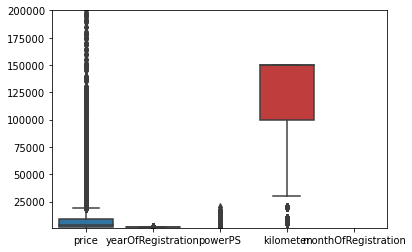

In [40]:
sns.boxplot(data=auto2[number_of_columns])
plt.ylim(1000, 200000) ## поставил не жёсткие рамки, чтобы было видно где, примерно находится большинство значений
plt.show()

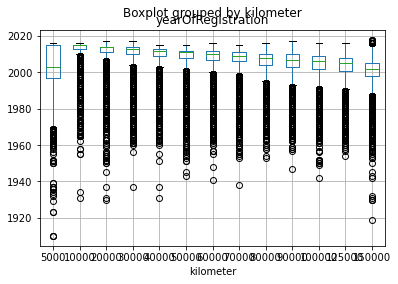

In [52]:
auto2.boxplot(column='yearOfRegistration', by='kilometer')
plt.show()

#### Масштабируем:

In [7]:
scaler = MinMaxScaler()
auto2[number_of_columns] = scaler.fit_transform(auto2[number_of_columns])
auto2.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration
count,246385.000000,246385.000000,246385.000000,246385.000000,246385.000000
mean,0.000083,0.863722,0.006318,0.820801,0.514415
std,0.003533,0.060613,0.007437,0.275138,0.289336
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000015,0.824074,0.003950,0.655172,0.250000
50%,0.000038,0.870370,0.005800,1.000000,0.500000
75%,0.000087,0.907407,0.007500,1.000000,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000


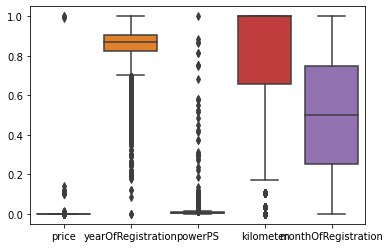

In [54]:
sns.boxplot(data=auto2[number_of_columns])
plt.show()

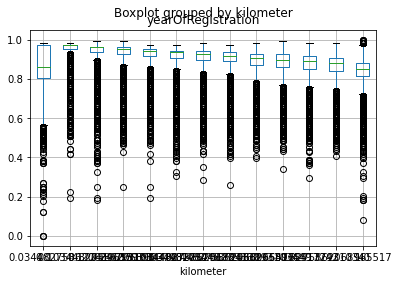

In [8]:
auto2.boxplot(column='yearOfRegistration', by='kilometer')
plt.show()

### Выполните замену категориальных признаков; выберите и обоснуйте способ замены.

In [9]:
categor = [i for i in auto2.columns if auto2[i].dtype.name == 'object']
print("Категориальные: " + str(categor))

Категориальные: ['seller', 'abtest', 'vehicleType', 'gearbox', 'fuelType', 'brand', 'notRepairedDamage']


#### Бесчисленные значения замененим на численные, начиная от нуля. Численные значения(старые) были преобразуем в новые.


In [10]:
nonbinary = [column for column in categor if len(auto2[column].unique()) > 2]

for column in [column for column in categor if len(auto2[column].unique()) == 2]:
    for i, unic in enumerate(auto2[column].unique()):
        auto2[column] = auto2[column].replace(to_replace=[unic], value=[i])

data_nonbinary = pd.get_dummies(auto2[nonbinary])
auto2.drop(nonbinary, axis=1, inplace=True)
auto2 = pd.concat([data_nonbinary, auto] , axis=1)
auto2

,vehicleType_andere,vehicleType_bus,vehicleType_cabrio,vehicleType_coupe,vehicleType_kleinwagen,vehicleType_kombi,vehicleType_limousine,vehicleType_suv,fuelType_andere,fuelType_benzin,...,brand_volvo,seller,price,abtest,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,notRepairedDamage
3,0,0,0,0,1,0,0,0,0,1,...,0,0,0.000015,0,0.842593,0,0.00375,1.000000,0.500000,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0.000036,0,0.907407,0,0.00345,0.586207,0.583333,0
5,0,0,0,0,0,0,1,0,0,1,...,0,0,0.000007,0,0.787037,0,0.00510,1.000000,0.833333,1
6,0,0,1,0,0,0,0,0,0,1,...,0,0,0.000022,0,0.870370,0,0.00545,1.000000,0.666667,0
7,0,0,0,0,0,0,1,0,0,1,...,0,0,0.000000,0,0.648148,0,0.00250,0.241379,0.583333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371520,0,0,0,0,0,0,1,0,0,1,...,0,0,0.000032,1,0.870370,0,0.01125,1.000000,0.416667,1
371521,0,1,0,0,0,0,0,0,0,1,...,0,0,0.000012,1,0.833333,0,0.00000,1.000000,0.250000,0
371524,0,0,1,0,0,0,0,0,0,1,...,0,0,0.000012,0,0.833333,1,0.00505,0.827586,0.250000,0
371525,0,1,0,0,0,0,0,0,0,0,...,0,0,0.000092,0,0.796296,0,0.00510,1.000000,0.250000,0


### Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других;

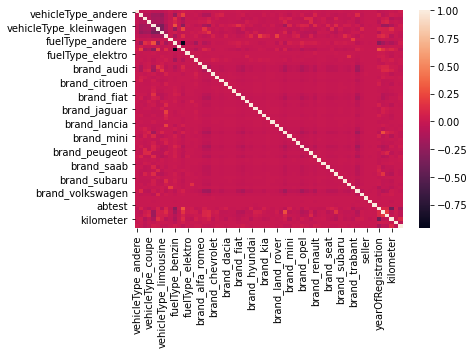

In [11]:
corr_matrix = auto2.corr()
sns.heatmap(corr_matrix)

##### Особо сильной корреляции нет

### Заполните пропущенные значения в данных;

In [12]:
auto2.isnull().sum()

vehicleType_andere        0
vehicleType_bus           0
vehicleType_cabrio        0
vehicleType_coupe         0
vehicleType_kleinwagen    0
                         ..
gearbox                   0
powerPS                   0
kilometer                 0
monthOfRegistration       0
notRepairedDamage         0
Length: 63, dtype: int64

In [13]:
auto2.isnull().sum().sum()

0

##### Пропущенных значений нет

### Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйтеперекрёстную проверку (изучите возможные для изменения параметры метода регрессии). Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказаннымс учётом p-value.

In [14]:
auto3 = auto2
dX, dY = auto3.drop(['price'], axis=1), auto3['price']
tr_x, t_x, tr_y, t_y = train_test_split(dX, dY, test_size = 0.3, random_state = 123)
lasso = Lasso()

Линейная регрессия, LASSO регуляризатор


In [17]:
params = {'alpha': np.arange(0, 0.1, 0.01)}
l_grid = GridSearchCV(lasso, params)
l_grid.fit(tr_x, tr_y)
best_a = l_grid.best_estimator_.alpha
print('Лучшее знач Альфа:', best_a, end="\n ")

l = Lasso(alpha=best_a)
l.fit(tr_x,tr_y)
pred_l = l.predict(t_x)
print(pred_l[:15] - t_y[:15])

Pirson, p_value_pirs = pearsonr(pred_l, t_y)
Spirman, p_value_speer = spearmanr(pred_l, t_y)
print("\nКорреляция Пирсона: ", Pirson)
print("Корреляция Спирмена: ", Spirman)
print("p-value Пирсон:", p_value_pirs)
print("p-value Спирмен:", p_value_speer)

Лучшее знач Альфа: 0.0
 55047    -0.000013
74300     0.000014
26580    -0.000026
198933    0.000010
118142   -0.000039
148869    0.000045
368730    0.000015
59375     0.000053
338033    0.000042
208567    0.000148
4516      0.000047
168315    0.000001
14098    -0.000057
230127    0.000057
4736     -0.000036
Name: price, dtype: float64

Корреляция Пирсона:  0.015101849203480858
Корреляция Спирмена:  0.6664625858655381
p-value Пирсон: 4.026051735619239e-05
p-value Спирмен: 0.0


#### Линейная регрессия, RIDGE регуляризатор

In [23]:

rid = Ridge()
params = {'alpha': np.arange(0, 3, 0.05)}
rid_grid = GridSearchCV(rid, params)
rid_grid.fit(tr_x, tr_y)
best_alpha = rid_grid.best_estimator_.alpha
print('Лучшее значение альфа:', best_alpha)


rid = Ridge(alpha=best_alpha)
rid.fit(tr_x,tr_y)
pred_rid = rid.predict(t_x)
print(pred_rid[:15] - t_y[:15])

Pirson, p_value_pir = pearsonr(pred_rid, t_y)
Spirman, p_value_sp = spearmanr(pred_rid, t_y)
print(f"Pearson correlation: {Pirson} p_value: {p_value_pir}\nSpearman correlation: {Spirman} p_value: {p_value_sp}")

Лучшее значение альфа: 2.95
55047    -1.177221e-05
74300     1.404210e-05
26580    -2.650997e-05
198933    9.942933e-06
118142   -3.949550e-05
148869    4.552356e-05
368730    1.516252e-05
59375     5.288264e-05
338033    4.182339e-05
208567    1.474676e-04
4516      4.796803e-05
168315    3.952476e-07
14098    -5.686400e-05
230127    5.710777e-05
4736     -3.615268e-05
Name: price, dtype: float64
Pearson correlation: 0.015133855148455258 p_value: 3.8771275935637246e-05
Spearman correlation: 0.6643025554329892 p_value: 0.0
